Ejercicio realizado por Oscar Bermúdez Gallego

# Qué es JAX y cuáles son sus principales características
JAX es una biblioteca de Python para la diferenciación automática y la computación de alto rendimiento. Sus principales características incluyen la diferenciación automática, la compilación just-in-time (JIT) y la capacidad de ejecutar código en GPUs y TPUs.

# Importar Jax

In [64]:
import jax
import jax.numpy as jnp
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import numpy as np
from jax import random, grad, jit
import torch
import torch.nn as nn
import torch.optim as optim
import time
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
from sklearn.metrics import confusion_matrix

# JAX permite calcular derivadas automáticamente usando la función grad


In [ ]:
def f(x):
    return x**2 + 3*x + 2

df_dx = jax.grad(f)
print(df_dx(2.0))

# Compilación just-in-time (JIT)
JAX puede compilar funciones para ejecutarlas más rápido usando la función jit

In [4]:
@jax.jit
def g(x):
    return jnp.sin(x) + jnp.cos(x)

print(g(1.0))

1.3817732


# JAX puede ejecutar código en GPUs y TPUs automáticamente si están disponibles

In [ ]:
x = jnp.array([1.0, 2.0, 3.0])
print(x)

# Comparación de JAX con TensorFlow y PyTorch
Comparación de las características y el rendimiento de JAX con TensorFlow y PyTorch, incluyendo la diferenciación automática, la compilación JIT y la ejecución en hardware acelerado.

| Característica       | JAX                                    | TensorFlow                                | PyTorch                                 |
|----------------------|----------------------------------------|-------------------------------------------|-----------------------------------------|
| **Paradigma**         | Funcional                              | Imperativo y estructurado (Eager Execution) | Imperativo (más intuitivo para objetos) |
| **Uso Principal**     | Investigación y optimización avanzada  | Producción a gran escala, herramientas de despliegue | Investigación y prototipado rápido     |
| **Soporte de Hardware**| Excelente para GPUs/TPUs               | Soporte sólido para GPUs/TPUs              | Soporte sólido para GPUs/TPUs           |
| **Facilidad de Uso**  | Requiere más conocimiento técnico, adecuado para investigadores | Fácil de usar en producción, más estructurado | Fácil de aprender, ampliamente adoptado |
| **Ecosistema**        | Enfocado en investigación, más limitado en producción | Amplio ecosistema para producción y despliegue | Enfocado en investigación, pero con buena integración para producción |
| **Flexibilidad**      | Alta, permite transformaciones avanzadas y personalización | Menos flexible, más orientado a la rapidez de desarrollo | Moderadamente flexible, más control en el modelo |


In [13]:
# Definir el modelo
def model(params, x):
    w1, b1, w2, b2 = params
    x = jnp.dot(x, w1) + b1
    x = jnp.tanh(x)
    x = jnp.dot(x, w2) + b2
    return x

# Inicializar parámetros
key = random.PRNGKey(0)
params = [
    random.normal(key, (2, 5)),
    jnp.zeros(5),
    random.normal(key, (5, 1)),
    jnp.zeros(1)
]

# Función de pérdida
def loss_fn(params, x, y):
    pred = model(params, x)
    return jnp.mean((pred - y) ** 2)

x = jnp.ones((10, 2))
y = jnp.ones((10, 1))

loss_grad = jit(grad(loss_fn))

start = time.time()
grads = loss_grad(params, x, y)
end = time.time()

tiempo_jax = (f"Tiempo de ejecución en JAX: {end - start} segundos")


# PyTorch

In [14]:
# Definir el modelo
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.layer1(x))
        x = self.layer2(x)
        return x

# Crear el modelo
model = MLP()

# Función de pérdida
criterion = nn.MSELoss()

# Optimización
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Crear datos de entrada aleatorios
x = torch.ones((10, 2))
y = torch.ones((10, 1))

# Medir el tiempo de ejecución
start = time.time()
optimizer.zero_grad()
output = model(x)
loss = criterion(output, y)
loss.backward()
optimizer.step()
end = time.time()

tiempo_py = (f"Tiempo de ejecución en PyTorch: {end - start} segundos")


# TensorFlow

In [15]:
# Definir el modelo
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense1 = tf.keras.layers.Dense(5, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return x

# Crear el modelo
model = MLP()

# Función de pérdida
loss_fn = tf.keras.losses.MeanSquaredError()

# Optimización
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Crear datos de entrada aleatorios
x = tf.ones((10, 2))
y = tf.ones((10, 1))

# Medir el tiempo de ejecución
start = time.time()
with tf.GradientTape() as tape:
    output = model(x)
    loss = loss_fn(y, output)
gradients = tape.gradient(loss, model.trainable_variables)
optimizer.apply_gradients(zip(gradients, model.trainable_variables))
end = time.time()

tiempo_tf = (f"Tiempo de ejecución en TensorFlow: {end - start} segundos")


# Comparación

0.11281108856201172
0.07346129417419434
0.2536311149597168


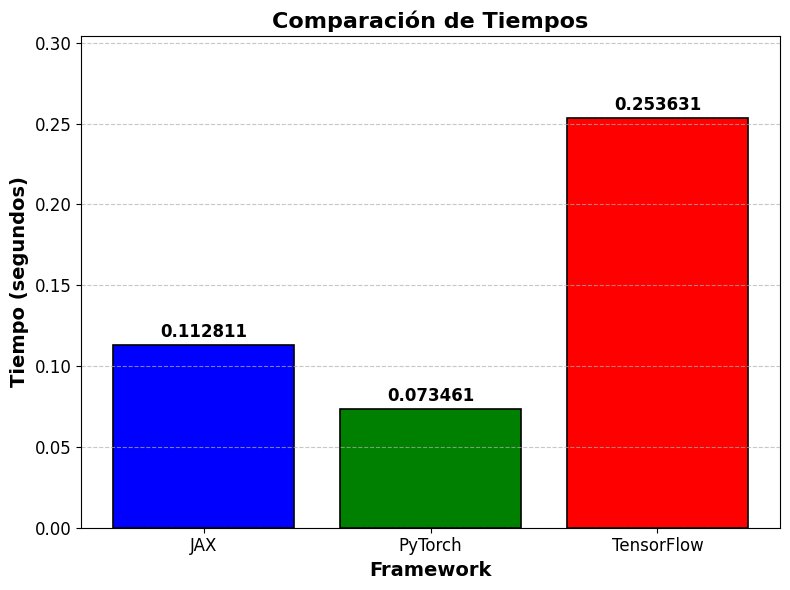

In [69]:
print(tiempo_jax)
print(tiempo_py)
print(tiempo_tf)

etiquetas = ['JAX', 'PyTorch', 'TensorFlow']
valores = [tiempo_jax, tiempo_py, tiempo_tf]

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(etiquetas, valores, color=['blue', 'green', 'red'], edgecolor='black', linewidth=1.2)

ax.set_title('Comparación de Tiempos', fontsize=16, fontweight='bold')
ax.set_xlabel('Framework', fontsize=14, fontweight='bold')
ax.set_ylabel('Tiempo (segundos)', fontsize=14, fontweight='bold')

valores = list(map(float, valores))

ax.set_ylim(bottom=0, top=max(valores) * 1.2)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.6f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

PyTorch fue el más rápido, seguido de JAX, mientras que TensorFlow tuvo el tiempo de ejecución más alto.

# Ejemplo utilizando Jax

# Ecosistema al rededor de Jax



*   Flax
    * Características:
      * Soporta la creación de modelos de redes neuronales de manera declarativa.
      * Compatible con las funcionalidades de JAX como jit, grad, etc.
      * Proporciona capas y mecanismos de entrenamiento como el optimizador optax.
*   Optax
    * Características:
      * Optimizadores estándar como Adam, SGD, RMSProp, etc.
      * Soporta programación de actualizaciones de parámetros en el entrenamiento.
      * Integración con JAX para computación en GPU/TPU.
*   Haiku
    * Características:
      * Facilita la creación de modelos con poca cantidad de código.
      * Muy útil para construir redes neuronales profundas y complejas.
      * Compatible con el ecosistema JAX y optimizada para su uso en entornos de alto rendimiento.
*   Jraph
    * Características:
      * Implementa modelos de redes neuronales sobre grafos (GNN).
      * Compatible con JAX, aprovechando su optimización para computación en GPU/TPU.
      * Ofrece una API simple para definir capas de GNN.



# Cargamos el dataset
Elegimos un dataset de mnist con imágenes del 0 al 9 para que nuestra red neuronal sea capaz de distinguirlos.

In [41]:
(train_data, test_data), info = tfds.load('mnist', split=['train', 'test'], with_info=True, as_supervised=True)

# Normalizar las imágenes a valores entre 0 y 1 usando tf.numpy
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_img).batch(32)
test_data = test_data.map(normalize_img).batch(32)

# Definición de modelo

In [42]:
def model(params, x):
    w1, b1, w2, b2 = params
    x = jnp.dot(x, w1) + b1
    x = jnp.tanh(x)
    x = jnp.dot(x, w2) + b2
    return x


# Definición de función de pérdida

In [43]:
def loss_fn(params, x, y):
    logits = model(params, x)
    return -jnp.mean(jnp.sum(y * jax.nn.log_softmax(logits), axis=1))

Inicializamos los parámetros

In [44]:
# Inicialización de parámetros
key = random.PRNGKey(0)
params = [
    random.normal(key, (28 * 28, 128)),
    jnp.zeros(128),
    random.normal(key, (128, 10)),
    jnp.zeros(10)
]

Calculo de gradientes

In [45]:
# Calcular gradientes
loss_grad = jit(grad(loss_fn))

# Entrenamiento

In [55]:
epochs = 50
learning_rate = 0.001

for epoch in range(epochs):
    epoch_loss = 0
    for batch, (x_batch, y_batch) in enumerate(train_data):
        # Convertir imágenes a jax.numpy
        x_batch = jnp.array(x_batch, dtype=jnp.float32)
        # Aplanar las imágenes
        x_batch = x_batch.reshape(x_batch.shape[0], -1)

        # Convertir las etiquetas a jax.numpy
        y_batch = jnp.array(y_batch, dtype=jnp.int32)
        y_batch_onehot = jax.nn.one_hot(y_batch, 10)

        grads = loss_grad(params, x_batch, y_batch_onehot)
        params = [(w - learning_rate * grad_w) for w, grad_w in zip(params, grads)]

        if batch % 100 == 0:
            current_loss = loss_fn(params, x_batch, y_batch_onehot)
            epoch_loss += current_loss

    print(f"Epoch {epoch} finished, Avg Loss: {epoch_loss / batch:.4f}")

Epoch 0 finished, Avg Loss: 0.0146
Epoch 1 finished, Avg Loss: 0.0143
Epoch 2 finished, Avg Loss: 0.0140
Epoch 3 finished, Avg Loss: 0.0138
Epoch 4 finished, Avg Loss: 0.0135
Epoch 5 finished, Avg Loss: 0.0133
Epoch 6 finished, Avg Loss: 0.0130
Epoch 7 finished, Avg Loss: 0.0128
Epoch 8 finished, Avg Loss: 0.0126
Epoch 9 finished, Avg Loss: 0.0124
Epoch 10 finished, Avg Loss: 0.0122
Epoch 11 finished, Avg Loss: 0.0120
Epoch 12 finished, Avg Loss: 0.0118
Epoch 13 finished, Avg Loss: 0.0117
Epoch 14 finished, Avg Loss: 0.0115
Epoch 15 finished, Avg Loss: 0.0114
Epoch 16 finished, Avg Loss: 0.0112
Epoch 17 finished, Avg Loss: 0.0111
Epoch 18 finished, Avg Loss: 0.0109
Epoch 19 finished, Avg Loss: 0.0108
Epoch 20 finished, Avg Loss: 0.0106
Epoch 21 finished, Avg Loss: 0.0105
Epoch 22 finished, Avg Loss: 0.0104
Epoch 23 finished, Avg Loss: 0.0102
Epoch 24 finished, Avg Loss: 0.0101
Epoch 25 finished, Avg Loss: 0.0100
Epoch 26 finished, Avg Loss: 0.0099
Epoch 27 finished, Avg Loss: 0.0098
Ep

# Prueba del modelo

In [57]:
correct = 0
total = 0
for x_batch, y_batch in test_data:

    # Convertir x_batch a jax.numpy
    x_batch = jnp.array(x_batch, dtype=jnp.float32)

    # Aplanar las imágenes
    x_batch = x_batch.reshape(x_batch.shape[0], -1)

    # Convertir las etiquetas a jax.numpy
    y_batch = jnp.array(y_batch, dtype=jnp.int32)
    y_batch_onehot = jax.nn.one_hot(y_batch, 10)

    logits = model(params, x_batch)
    predictions = jnp.argmax(logits, axis=1)

    correct += jnp.sum(predictions == y_batch)
    total += len(y_batch)

accuracy = correct / total
print(f"Precisión en el conjunto de test: {accuracy:.4f}")

Precisión en el conjunto de test: 0.8477


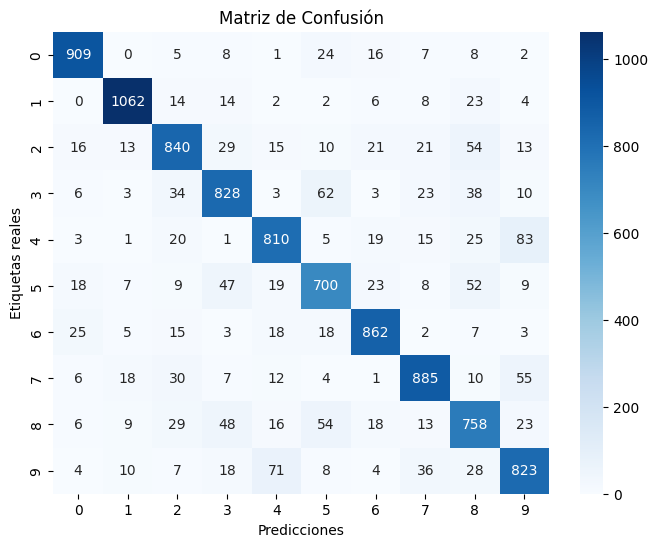

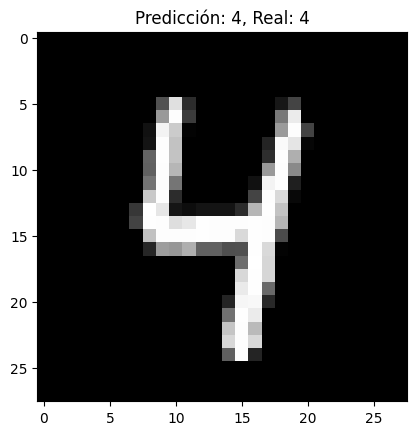

In [68]:
y_true = []
y_pred = []

for x_batch, y_batch in test_data:

    x_batch = x_batch.reshape(x_batch.shape[0], -1)
    x_batch = jnp.array(x_batch, dtype=jnp.float32)
    y_batch = jnp.array(y_batch, dtype=jnp.int32)
    y_batch_onehot = jax.nn.one_hot(y_batch, 10)

    logits = model(params, x_batch)
    predictions = jnp.argmax(logits, axis=1)

    y_true.extend(y_batch.tolist())
    y_pred.extend(predictions.tolist())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.show()

plt.imshow(x_batch[2].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {y_pred[2]}, Real: {y_true[2]}')
plt.show()


# Conclusión
JAX es ideal para investigación avanzada y optimización debido a su flexibilidad y eficiencia en el cálculo de gradientes y paralelización. A diferencia de TensorFlow y PyTorch, se destaca en personalización y control de bajo nivel, pero carece del ecosistema robusto para producción que ofrecen las otras dos bibliotecas.